In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
# File to Load
city_data = pd.read_csv("Resources/city_data.csv")
city_data.head()
#len(city_data["city"].unique())

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [27]:
ride_data = pd.read_csv("Resources/ride_data.csv")
ride_data.head()
#len(ride_data["city"].unique())

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [28]:
# Combine the data into a single dataset
city_ride=pd.merge(ride_data, city_data, how="left", on=["city", "city"])
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [33]:
# Obtain the x and y coordinates for each of the three city types
city_ride_group=city_ride.groupby("city")
city_ride_group["city"].count()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: city, dtype: int64

In [34]:
city_ride_group_count=pd.Series(city_ride_group["city"].count())
city_ride_group_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: city, dtype: int64

In [36]:
city_ride_group_av_fare=pd.Series(city_ride_group["fare"].mean())
city_ride_group_av_fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [58]:
city_type=city_data.copy()
city_type=city_type.set_index("city")
city_type=pd.Series(city_type.loc[:,"type"])
city_type=city_type.sort_index()
city_type.head()

city
Amandaburgh         Urban
Barajasview         Urban
Barronchester    Suburban
Bethanyland      Suburban
Bradshawfurt        Rural
Name: type, dtype: object

In [75]:
city_type_color=[]
for city in city_type:
    if city=="Urban":
        city_type_color.append("orange")
    elif city=="Suburban":
        city_type_color.append("cyan")
    else:
        city_type_color.append("yellow")
city_type_color

['orange',
 'orange',
 'cyan',
 'cyan',
 'yellow',
 'cyan',
 'orange',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'yellow',
 'orange',
 'cyan',
 'yellow',
 'orange',
 'orange',
 'orange',
 'yellow',
 'orange',
 'orange',
 'cyan',
 'orange',
 'orange',
 'orange',
 'cyan',
 'orange',
 'yellow',
 'orange',
 'yellow',
 'cyan',
 'cyan',
 'cyan',
 'orange',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'orange',
 'orange',
 'cyan',
 'yellow',
 'cyan',
 'orange',
 'orange',
 'cyan',
 'orange',
 'orange',
 'cyan',
 'yellow',
 'cyan',
 'yellow',
 'cyan',
 'orange',
 'yellow',
 'yellow',
 'orange',
 'orange',
 'cyan',
 'orange',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'yellow',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'cyan',
 'yellow',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'cyan',
 'orange',
 'orange',
 'orange',
 'cyan',
 'cyan',
 'orange',
 'orange',
 'yellow',
 'orange',
 'orange',
 'yellow',
 'or

In [60]:
driver_count=city_data.copy()
driver_count=driver_count.set_index("city")
driver_count=pd.Series(driver_count.loc[:,"driver_count"])
driver_count=driver_count.sort_index()
driver_count.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

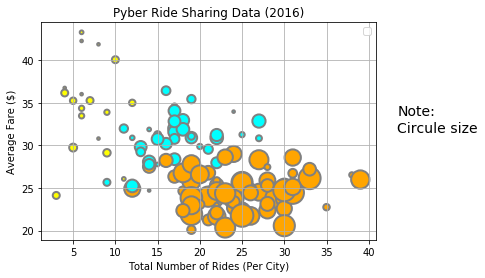

In [119]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

# Change color with c and alpha
plt.scatter(city_ride_group_count, city_ride_group_av_fare, s=driver_count*7, c=city_type_color,alpha=1, edgecolors="grey", linewidth=2)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
handles=city_type_color
labels=["Urban","Suburban","Rural"]
plt.legend(handles,labels,loc="best")
plt.grid()
text="Note:" + '\n' + "Circule size corre"
plt.gcf().text(0.95, 0.5, text, fontsize=14)
plt.savefig("pyber_ride.png")
plt.show()